In [2]:
import numpy as np
import matplotlib.pyplot as plt
# To install the package, run the following command:
# !pip install SciencePlots
import scienceplots

In [3]:
# Load the data
# B is just two coordinates to make a horizontal line illustrating the buffer size.
B = np.loadtxt('data/B.csv')
# out_tr is the mean delay per node
out_tr = np.loadtxt('data/out_tr.csv')

In [4]:
# Using a standardized style set that largely holds to Nature's guidelines.
plt.style.use('science')
plt.style.use(['science','nature'])

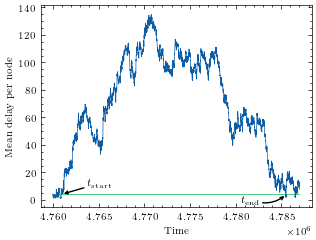

In [5]:
# Here we plot the figure.
with plt.style.context('science'):
    fig, ax1 = plt.subplots()
    
    # Plot data
    lwidth=0.5
    ax1.plot(out_tr[:,0], out_tr[:,1], label= r"mean delay per firm", linewidth=lwidth, zorder=2)
    ax1.plot(B[:,0], B[:,1], label= r"$B \approx 4.05$", linewidth=lwidth, zorder=1)
    
    # labels
    ax1.set_xlabel(r"Time")
    ax1.set_ylabel(r"Mean delay per node")

    # Arrows to annotate the start and end of the avalanche.
    arrow_x1 = 4.76089E6 # x-coordinate of the arrow
    arrow_y1 = 3.95 # y-coordinate of the arrow
    text_x1 = 4.765E6 # x-coordinate of the text box
    text_y1 = 15 # y-coordinate of the text box
    arrow_text1 = r'$t_{\mathrm{start}}$'
    p = 0
    ax1.annotate(arrow_text1, 
                xy=(arrow_x1, arrow_y1), xytext=(text_x1, text_y1),
                arrowprops=dict(arrowstyle="->,head_length=0.3,head_width=0.15")
                , va='top', ha='center',
                color='black', 
                
                zorder = 100,bbox=dict(pad=p, facecolor="none", edgecolor="none"))
    arrow_x2 = 4.7856E6 # x-coordinate of the arrow
    arrow_y2 = 4.07 # y-coordinate of the arrow
    text_x2 = arrow_x2 - 0.005E6# x-coordinate of the text box
    text_y2 = -0 # y-coordinate of the text box
    arrow_text2 = r'$t_{\mathrm{end}}$'
    ax1.annotate(arrow_text2, 
                xy=(arrow_x2, arrow_y2), xytext=(text_x2, text_y2),
                arrowprops=dict(arrowstyle="->,head_length=0.3,head_width=0.15", connectionstyle="arc3,rad=0.3"), 
                color='black',
                va='center', ha='left', 
                zorder = 100,
                bbox=dict(pad=p, facecolor="none", edgecolor="none"))                
    plt.savefig("single_avalanche.pdf", bbox_inches="tight")
    plt.show()


In [6]:
import pandas as pd

# Exporting out_tr data to CSV
out_tr_df = pd.DataFrame(out_tr, columns=['Time', 'Mean delay per firm'])
out_tr_df.to_csv('out_tr_data.csv', index=False)

# Exporting B data to CSV
B_df = pd.DataFrame(B, columns=['Time', 'B value'])
B_df.to_csv('B_data.csv', index=False)

with pd.ExcelWriter('fig_source_data/all_source_data.xlsx', engine='xlsxwriter') as writer:
    out_tr_df.to_excel(writer, sheet_name='Thiers13_delays', index=False)
    B_df.to_excel(writer, sheet_name='Workplace15_delays', index=False)